Visually representing the content of a text document is one of the most important tasks in the field of text mining. ... For example, many text visualizations do not represent the text directly, they represent an output of a language model(word count, character length, word sequences, etc.).

### Following activities are performed
1. PRE PROCESSING
2. MODELLING
3. POST PROECESSING
4. PRESENTATION

####  ACCESS --> TOKENIZE --> NORMALIZE  --> STOP WORD --> FEATURING TABLE --> VISULAIZATION
    BS4        SPLIT()      LOWER()          CREATE              COUNTER SORT       TABLE ==> | WORD | FREQUECNY |
    URL LIB                                  SW LIST                                BAR CHARTS
                                                                                    WORD CLOUD

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
#create some functions for cleaning and counting
def wordfreq(words):
    """Function to generated the frequency distribution of the given text"""
    word_freq={}
    for tok in words:
        if tok.lower() in word_freq:
            word_freq [tok.lower()]+=1
        else:
            word_freq [tok.lower()]=1
        #print(word_freq)
    return word_freq
def sort_tokens(tokens):
    import operator
    sorted_d = sorted(tokens.items(), key=operator.itemgetter(1),reverse=True)
    #print('Dictionary in descending order by value : ',sorted_d)
    #print(sorted_d[:25])
    return(sorted_d)

In [3]:
text = "all your base are belong to us"

In [4]:
wordcloud = WordCloud().generate(text)

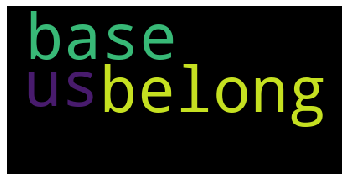

In [5]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [6]:
def plot_wordcloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

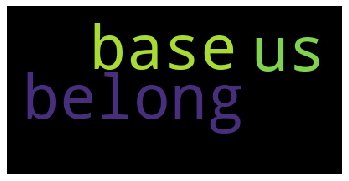

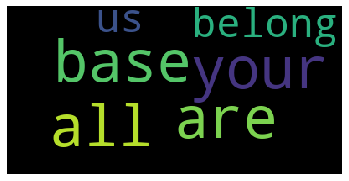

In [7]:
wordcloud = WordCloud().generate(text)
plot_wordcloud(wordcloud)
wordcloud = WordCloud(stopwords={'to', 'of'}).generate(text)
plot_wordcloud(wordcloud)

In [8]:
#Explore couple of corpuses
import nltk
washington = nltk.corpus.inaugural.raw('1789-Washington.txt')
obama = nltk.corpus.inaugural.raw('2009-Obama.txt')

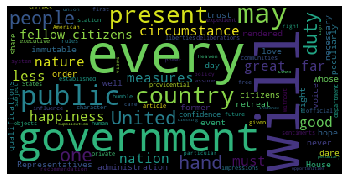

In [9]:
wordcloud = WordCloud(relative_scaling=1.0).generate(washington)
plot_wordcloud(wordcloud)

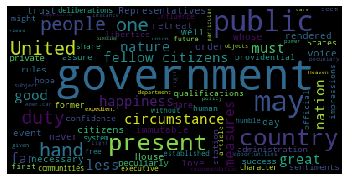

In [10]:
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add("every")
stopwords.add("will")
wordcloud = WordCloud(stopwords=stopwords, relative_scaling=1.0).generate(washington)
plot_wordcloud(wordcloud)

Now lets get on to understanding the utility of each of the tool for analysing the text. First lets explore the data from president's speech. The speech is available at: (https://www.rev.com/blog/donald-trump-speech-transcript-turning-point-usa-teen-student-summit-speech)

In [11]:
#Trump speech
from urllib.request import urlopen
response = urlopen('https://www.rev.com/blog/donald-trump-speech-transcript-turning-point-usa-teen-student-summit-speech')
html = response.read()
print(len(html))
tokens = [tok for tok in html.split()]

203872


In [12]:
#We clean it a bit
from bs4 import BeautifulSoup
print("Calling BS4")
soup = BeautifulSoup(html, 'html.parser')

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract() 

Calling BS4


In [13]:
tokens = [tok for tok in soup.get_text().split()]

In [14]:
#Get the token
tokens = [tok for tok in soup.get_text().split()]
stop_words = ['>>>','and','to','the','for', 'is','of', '#','=','a','in','The', 'i', 'I', 'they', 'you', 'i', 'we', 'that', 'have','our', 'it', 'it’s','are','they','but','this', 'not', 'going', 'be', 'he', 'we’re', 'all', 'because']
tokens_clean = []
for token in tokens:
    if token in stop_words:
        pass
    else:
        tokens_clean.append(token)
#print(tokens_clean)   

In [15]:
print(tokens_clean[0:10])

['Donald', 'Trump', 'Speech', 'Transcript:', 'Turning', 'Point', 'USA', 'Teen', 'Student', 'Summit']


In [16]:
new_tokens = wordfreq(tokens_clean)

In [17]:
#print(new_tokens)

In [18]:
data = sort_tokens(new_tokens)
#print(data)

In [19]:
#Sort the dcitionary on the basis of word freuqncy
import operator
sorted_d = sorted(new_tokens.items(), key=operator.itemgetter(1),reverse=True)
#print('Dictionary in descending order by value : ',sorted_d)
print(sorted_d[:25])

[('trump:', 141), ('they', 88), ('we', 84), ('was', 80), ('they’re', 61), ('don’t', 60), ('do', 59), ('will', 57), ('people', 57), ('that’s', 57), ('on', 55), ('so', 55), ('with', 54), ('it.', 53), ('what', 53), ('like', 52), ('and', 51), ('you', 51), ('just', 50), ('it’s', 49), ('one', 48), ('said,', 45), ('no', 44), ('these', 44), ('when', 43)]


In [20]:
#Create a Pandas dataframe for word frequency
import pandas as pd
word_frequency = pd.DataFrame(data, columns = ['word', 'frequency'])

In [21]:
#Explore the word frequency
word_frequency.head()

,word,frequency
0,trump:,141
1,they,88
2,we,84
3,was,80
4,they’re,61


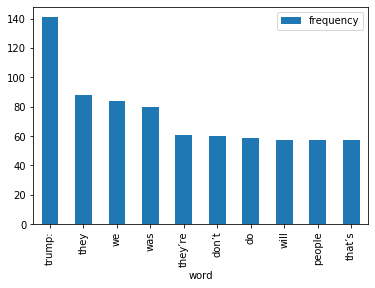

In [22]:
#Plot word frequency of first few words as a bar plot
word_frequency[0:10].plot.bar('word', 'frequency')

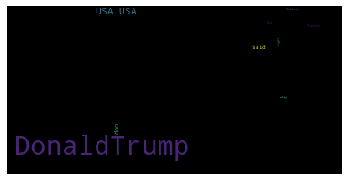

In [23]:
#Now visualize the words with wordcloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add("every")
stopwords.add("will")
wordcloud = WordCloud(stopwords=stopwords, relative_scaling=1.0).generate(''.join(tokens_clean))
plot_wordcloud(wordcloud)

This clearly shows, word cloud brings out 'Donald' and 'Trump' in its discovery profile. However, we were unable to see this combination clearly in word frequency. Lets plan another tour with the web site 'python.org'. This gives a different perspective altogether.

In [24]:
#Clean text??
from urllib.request import urlopen
response = urlopen('http://python.org/')
html = response.read()
print(len(html))
tokens_py = [tok for tok in html.split()]
#print("Total no of tokens :"+ str(len(tokens_py)))
#print(tokens_py[0:100])

48900


In [25]:
#We clean it a bit
from bs4 import BeautifulSoup
print("Calling BS4")
soup = BeautifulSoup(html, 'html.parser')
#print(soup.get_text())
# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract() 
#print(soup.get_text())

Calling BS4


In [26]:
#Get the token
tokens_py = [tok for tok in soup.get_text().split()]
stop_words = ['>>>','and','to','the','for', 'is','of', '#','=','a','in','The', 'i', 'I', 'they', 'you', 'i', 'we', 'that', 'have','our', 'it', 'it’s','are','they','but','this', 'not', 'going', 'be', 'he', 'we’re', 'all', 'because']
tokens_clean = []
for token in tokens_py:
    if token in stop_words:
        pass
    else:
        tokens_clean.append(token)
#print(tokens_clean) 

In [27]:
print(tokens_py[0:100])

['Welcome', 'to', 'Python.org', 'Notice:', 'While', 'Javascript', 'is', 'not', 'essential', 'for', 'this', 'website,', 'your', 'interaction', 'with', 'the', 'content', 'will', 'be', 'limited.', 'Please', 'turn', 'Javascript', 'on', 'for', 'the', 'full', 'experience.', 'Skip', 'to', 'content', '▼', 'Close', 'Python', 'PSF', 'Docs', 'PyPI', 'Jobs', 'Community', '▲', 'The', 'Python', 'Network', 'Donate', '≡', 'Menu', 'Search', 'This', 'Site', 'GO', 'A', 'A', 'Smaller', 'Larger', 'Reset', 'Socialize', 'Facebook', 'Twitter', 'Chat', 'on', 'IRC', 'About', 'Applications', 'Quotes', 'Getting', 'Started', 'Help', 'Python', 'Brochure', 'Downloads', 'All', 'releases', 'Source', 'code', 'Windows', 'Mac', 'OS', 'X', 'Other', 'Platforms', 'License', 'Alternative', 'Implementations', 'Documentation', 'Docs', 'Audio/Visual', 'Talks', "Beginner's", 'Guide', "Developer's", 'Guide', 'FAQ', 'Non-English', 'Docs', 'PEP', 'Index', 'Python', 'Books', 'Python', 'Essays']


In [28]:
new_tokens = wordfreq(tokens_py)

In [29]:
#Sort the dcitionary on the basis of word freuqncy
data = sort_tokens(new_tokens)

In [30]:
#print('Dictionary in descending order by value : ',sorted_d)
print(data)

[('python', 50), ('>>>', 24), ('and', 20), ('the', 19), ('to', 16), ('for', 14), ('more', 12), ('is', 11), ('news', 11), ('events', 11), ('community', 10), ('a', 10), ('of', 10), ('#', 9), ('psf', 8), ('software', 8), ('=', 8), ('3', 8), ('in', 8), ('your', 7), ('with', 7), ('other', 7), ('docs', 6), ('about', 6), ('guide', 6), ('all', 5), ('code', 5), ('lists', 5), ('1', 5), ('programming', 5), ('product', 5), ('on', 4), ('user', 4), ('group', 4), ('archive', 4), ('3:', 4), ('list', 4), ('are', 4), ('that', 4), ('simple', 4), ('learn', 4), ('2019', 4), ('foundation', 4), ('while', 3), ('be', 3), ('pypi', 3), ('▲', 3), ('irc', 3), ('started', 3), ('help', 3), ('source', 3), ('documentation', 3), ("developer's", 3), ('diversity', 3), ('report', 3), ('success', 3), ('stories', 3), ('scientific', 3), ('pycon', 3), ('submit', 3), ('an', 3), ('event', 3), ('2', 3), ('functions', 3), ('can', 3), ('/', 3), ('work', 3), ('&', 3), ('easy', 3), ('our', 3), ('flow', 3), ('available', 3), ('securi

In [31]:
#Create a Pandas dataframe for word frequency
word_frequency = pd.DataFrame(data, columns = ['word', 'frequency'])

In [32]:
#Tabular data
word_frequency.head()

,word,frequency
0,python,50
1,>>>,24
2,and,20
3,the,19
4,to,16


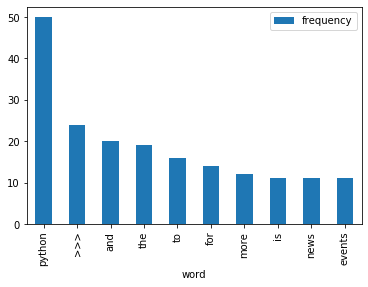

In [33]:
#Word frequency as bar chart
word_frequency[0:10].plot.bar('word', 'frequency')

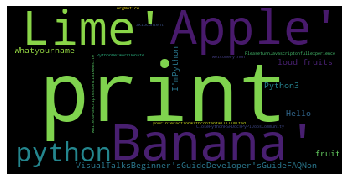

In [34]:
#Now visualize the words with wordcloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add("every")
stopwords.add("will")
wordcloud = WordCloud(stopwords=stopwords, relative_scaling=1.0).generate(''.join(tokens_clean))
plot_wordcloud(wordcloud)

In [35]:
#Get cleaned tokens
#Get the token
tokens = [tok for tok in soup.get_text().split()]
stop_words = ['>>>','and','to','the','for', 'is','of', '#','=','a','in','The', 'i', 'I', 'they', 'you', 'i', 'we', 'that', 'have','our', 'it', 'it’s','are','they','but','this', 'not', 'going', 'be', 'he', 'we’re', 'all', 'because']
tokens_clean = []
for token in tokens:
    if token in stop_words:
        pass
    else:
        tokens_clean.append(token)

In [36]:
new_tokens = wordfreq(tokens_clean)
data = sort_tokens(new_tokens)
print(data[:25])

[('python', 50), ('more', 12), ('news', 11), ('events', 11), ('community', 10), ('psf', 8), ('software', 8), ('3', 8), ('your', 7), ('with', 7), ('other', 7), ('docs', 6), ('about', 6), ('guide', 6), ('code', 5), ('lists', 5), ('1', 5), ('programming', 5), ('product', 5), ('on', 4), ('user', 4), ('group', 4), ('archive', 4), ('3:', 4), ('list', 4)]


In [37]:
#Create a Pandas dataframe for word frequency
word_frequency = pd.DataFrame(data, columns = ['word', 'frequency'])

In [38]:
#Tabular display of word frequency
word_frequency.head()

,word,frequency
0,python,50
1,more,12
2,news,11
3,events,11
4,community,10


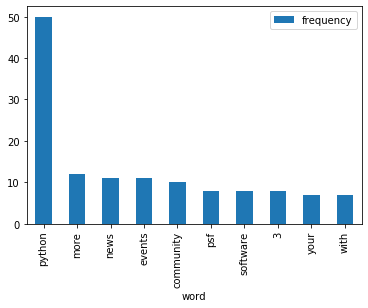

In [39]:
#Word frequency as bar chart
word_frequency[0:10].plot.bar('word', 'frequency')

In [40]:
print(tokens_clean[0:20])

['Welcome', 'Python.org', 'Notice:', 'While', 'Javascript', 'essential', 'website,', 'your', 'interaction', 'with', 'content', 'will', 'limited.', 'Please', 'turn', 'Javascript', 'on', 'full', 'experience.', 'Skip']


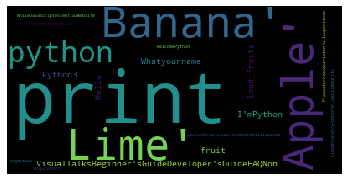

In [41]:
#Visualize word frequency
wordcloud = WordCloud(stopwords=stopwords, relative_scaling=1.0).generate(''.join(tokens_clean))
plot_wordcloud(wordcloud)

In conclusion, there is no single visualization techniques which gives complete clarity on the conent. It is advisable use multiple approaches to explore/discover the themes/insights from text.